# Taylor series expansion and error analysis



## Taylor series expansion

During the lecture, we talked several times about the Taylor series as a way to formally determine the differential of a property. As a brief reminder, the Taylor series can be used to approximate the value of a function $f(x)$ at a location $f(x +h)$ with the help of a polynomial series:

$$f(x+h) = \sum_{i=1}^n \frac{h^n}{n!} \frac{d^nf}{dx^n}(h)$$

As an example in the lecture, we approximated the sine function at several locations. This was pretty easy as the derivatives of $f(x) = \sin(x)$ can easily be calculated.

However, this is not always the case. Think about a tiny bit more complex function: $f(x) = \sin(x^2)$. Determining higher-order differentials quickly gets quite tricky - try it out, to convince yourself:

$$f(x) = \sin(x^2)$$

$$\frac{df}{dx} = 2x \cos(x^2)$$

$$\frac{d^2f}{dx^2} = ?$$

$$\frac{d^3f}{dx^3} = ??$$

Creating more differentials is a very systematic process and maybe not difficult - but requires quickly a lot of bookkeeping and is prone to errors - and it becomes very repetitive if you have to do it very often...

As soon as you read things in descriptions like: "requires bookkeeping", "not difficult systematic process" and "repetitive", I hope you think by now: **we should do that in Python**! Yes, correct!

So luckily, someone did the hard work of coding all these things into Python for us before: it is implemented in the sympy package for symbolic computation. 

We'll have a look at some of the basic features in this notebook - and then apply it to determine Taylor Series Expansions, and finally to the accuracy estimation that we did in the last lecture.




In [1]:
import sympy as sym
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
# to get LaTeX function rendereing:
sym.init_printing()

In [3]:
sym.var('x')

In [4]:
def plot_taylor(x0=0.0, n=1):
    func = sym.sin(x)#/x
    taylor = sym.series(func, x0=x0, n=n+1).removeO()

    evalfunc = sym.lambdify(x, func, modules=['numpy'])
    evaltaylor = sym.lambdify(x, taylor, modules=['numpy'])

    t = np.linspace(-2*np.pi, 3*np.pi, 100)
    plt.figure(figsize=(10,8))
    plt.plot(t, evalfunc(t), 'b', label='sin(x)')
    plt.plot(t, evaltaylor(t), 'r', label='Taylor')
    plt.plot(x0, evalfunc(x0), 'go', label='x0', markersize = 12)
    plt.legend(loc='upper left')
    plt.xlim([-1*np.pi, 2*np.pi])
    plt.ylim([-3,3])
    plt.show()

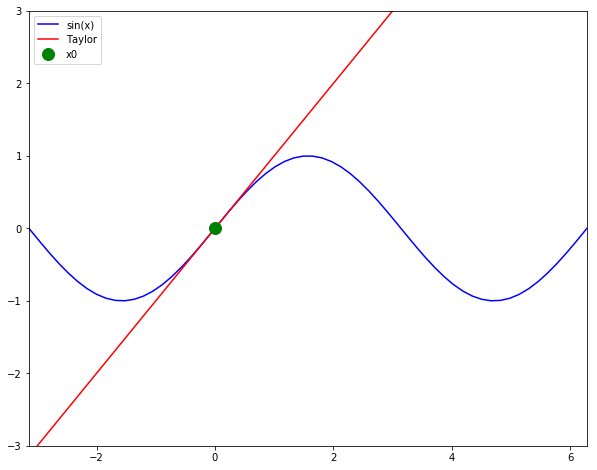

In [5]:
plot_taylor()

In [6]:
from ipywidgets import interactive
from IPython.display import Audio, display

In [7]:
plt.figure(figsize=(10,8))
plt.style.use("bmh")

In [8]:
v = interactive(plot_taylor, x0=(0.0,np.pi,np.pi/10.), n=(1,8), r=(2,4))
display(v)

In [9]:
def plot_taylor_lnx(x0=0.0, n=1):
    """Same method, different base function"""
    func = sym.ln(x)#/x
    taylor = sym.series(func, x0=x0, n=n+1).removeO()

    evalfunc = sym.lambdify(x, func, modules=['numpy'])
    evaltaylor = sym.lambdify(x, taylor, modules=['numpy'])

    t = np.linspace(0.01, 10, 100)
    plt.figure(figsize=(10,8))
    plt.plot(t, evalfunc(t), 'b', label='ln(x)')
    plt.plot(t, evaltaylor(t), 'r', label='Taylor')
    plt.plot(x0, evalfunc(x0), 'go', label='x0', markersize = 12)
    plt.legend(loc='upper left')
    plt.xlim([-0.2,10])
    plt.ylim([-3,3])
    plt.show()

In [10]:
v = interactive(plot_taylor_lnx, x0=(1,3,0.2), n=(1,8), r=(2,4))
display(v)

## Error analysis

Note that, in previous examples: for higher degrees of approximation, the local solution gets better, but the extrapolation gets worse!

Analyzing this in a bit more detail:

In [11]:
def plot_taylor_error(x0=0.0, n=1, s=1):
    func = sym.sin(x)#/x
    taylor = sym.series(func, x0=x0, n=n+1).removeO()

    evalfunc = sym.lambdify(x, func, modules=['numpy'])
    evaltaylor = sym.lambdify(x, taylor, modules=['numpy'])

    t = np.linspace(-2*np.pi, 3*np.pi, 100)
    fig = plt.figure(figsize=(10,8))
    ax1 = fig.add_subplot(211)
    # plt.plot(t, evalfunc(t), 'b', label='sin(x)')
    ax1.plot(t, evaltaylor(t)-evalfunc(t), 'r', label='Taylor error')
    ax1.plot(x0, 0, 'go', label='x0', markersize = 12)
    plt.legend(loc='upper left')
    ax1.set_xlim([-1*np.pi, 2*np.pi])
    ax1.set_ylim([-s*3,s*3])
    ax2 = fig.add_subplot(212)
    ax2.plot(t, evalfunc(t), 'b', label='sin(x)')
    ax2.plot(t, evaltaylor(t), 'r', label='Taylor')
    ax2.plot(x0, evalfunc(x0), 'go', label='x0', markersize = 12)
    plt.legend(loc='upper left')
    ax2.set_xlim([-1*np.pi, 2*np.pi])
    ax2.set_ylim([-3,3])


    plt.show()

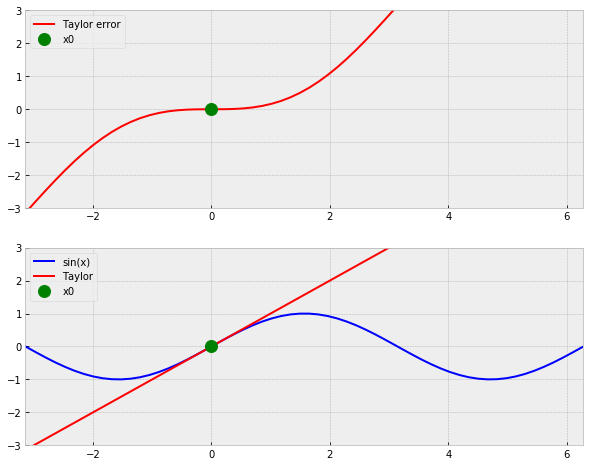

In [12]:
plot_taylor_error()

In [13]:
v = interactive(plot_taylor_error, x0=(0,np.pi,0.1*np.pi), n=(1,8), r=(2,4), s=(1,10))
display(v)